# Arbeitsintegrale - Vorlesung

**Themenüberblick:**

- Mechanik und Elektrodynamik: Kraftvektorfeld, Weg, Arbeit
- Thermodynamik: Differential, Prozess, Arbeit, Wärme
- Berechnungsvarianten
- Wegunabhängigkeit: Kriterium
- Potentialfunktionen

**zusätzliche Unterlagen:** `13_Arbeitsintegral-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Mechanik und Elektrodynamik

Um in der **Mechanik** und in der **Elektrodynamik** die Arbeit $W$ zu bestimmen, die von einer ortsabhängigen Kraft an einem Teilchen entlang eines beliebigen Weges geleistet wird, wird ein sogenanntes Arbeitsintegral berechnet. Dabei wird die ortsabhängige Kraft als Vektorfeld $F:\mathbb{R}^n \rightarrow \mathbb{R}^n$ modelliert und der Weg als Kurve $s:\mathbb{R} \rightarrow \mathbb{R}^n$. Die Dimension $n$ ist zwei für eine Berechnung in der Ebene und drei für eine Berechnung im Raum. 

Um den Arbeitsanteil entlang einer kurzen Wegdifferenz $\text{d}s$ (Wegstück, kurze Strecke) zu erhalten, wird die vektorielle Kraft $F$ am entsprechenden Ort mit der kurzen vektoriellen Wegdifferenz $\text{d}s$ im Sinn des inneren Produktes multipliziert. Dadurch wird nur der Anteil der Kraft in Richtung der Wegdifferenz berücksichtigt. Die gesamte Arbeit ist die Summe aller Arbeitsanteile im Grenzwert, dass die einzelnen Wegdifferenzen beliebig klein angenommen werden. Somit erhalten wir das Arbeitsintegral

$$W = \int F^T \text{d}s.$$

Oft wird das innere Produkt statt in Matrixschreibweise mit dem transponierten Kraftvektor mit einem Punkt (englisch "dot product") zwischen dem Kraftvektor und dem Wegstück geschrieben:

$$W = \int F \cdot \text{d}s.$$

**Beispiel:**

Kraft $F:\mathbb{R}^2 \rightarrow \mathbb{R}^2: F(x, y) =\begin{pmatrix} F_x (x,y) \\ F_y (x,y) \end{pmatrix} = \begin{pmatrix} yx \\ -x  \end{pmatrix}$, 
Weg $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = \begin{pmatrix} 4t^2 \\ 3t \end{pmatrix}$.

Zum Zeitpunkt $t$ ist das Teilchen am Ort $s(t)$ und die Kraft hat den Wert $F(s(t))= \begin{pmatrix} 3t4t^2 \\ -4t^2 \end{pmatrix} = \begin{pmatrix} 12t^3 \\ -4t^2 \end{pmatrix}.$ Die Wegdifferenz ist zum selben Zeitpunkt durch $\text{d}s = \begin{pmatrix} 8t\,\text{d}t \\ 3\,\text{d}t \end{pmatrix} = \begin{pmatrix} 8t \\ 3 \end{pmatrix}\text{d}t$ gegeben. Wir berechnen die von $F$ entlang $s$ verrichtete Arbeit zwischen den Zeitpunkten $t_1=0$ und $t_2=1$:

$$\begin{align}
W &= \int F \cdot \text{d}s \\
  &= \int_0^1 \begin{pmatrix} 12t^3 \\ -4t^2 \end{pmatrix} \cdot \begin{pmatrix} 8t \\ 3 \end{pmatrix} \text{d}t \\
  &= \int_0^1 (12t^3 8t - 4t^2 3) \,\text{d}t \\
  &= \int_0^1 (96t^4 - 12t^2) \,\text{d}t \\
  &= \frac{96}{5} - \frac{12}{3} = 15.2
\end{align}$$

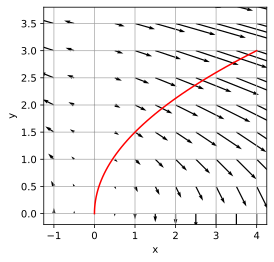

In [5]:
x = arange(-1, 4.5, 0.5)
y = arange(-1, 4.5, 0.5)
X, Y = meshgrid(x, y)
Fx = X*Y
Fy = -X

t = linspace(0, 1)
x = 4*t**2
y = 3*t

figure(figsize=(4,4))
Q = quiver(X, Y, Fx, Fy, units='xy', scale=8)
plot(x, y, 'r')
xlabel('x')
ylabel('y')
ylim(-.2, 3.8)
grid(True)

Wir schreiben das Arbeitsintegral detaillierter, indem wir das innere Produkt ausschreiben:

$$W = \int F \cdot \text{d}s = \int F_x (x,y)\,\text{d}x + F_y (x,y)\,\text{d}y.$$

Im obigen Beispiel bedeutet das $W = \int F \cdot \text{d}s = \int yx \text{d}x - x \text{d}y.$

## Thermodynamik

In der **Thermodynamik** wird dieselbe Mathematik mit anderen Begriffen verwendet: Statt Kraftfeldern verwendet man Differentiale, statt von Wegen spricht man von Prozessen.

**Beispiel:**

Ein Mol eines einatomigen idealen Gases erfüllt die Zustandsgleichung $pV=RT$. Zur Beschreibung des Zustands verwenden wir die beiden Zustandsgrößen $p$ (Druck) und $V$ (Volumen) als Koordinaten des Zustandsraums (= Menge aller Gleichgewichtszustände des Gases). Damit lassen sich die Zustandsgrößen $T$ (Temperatur), $U$ (innere Energie) und $S$ (Entropie) als folgende  Funktionen auf dem Zustandsraum schreiben:

- Temperatur $T(p,V) = \frac{pV}{R}$
- innere Energie  $U(p,V) = \frac{3}{2}pV = \frac{3}{2}RT(p,V)$
- Entropie $S(p,V) = \frac{3}{2}R\ln(pV^{5/3})$

Die **Wärme** $Q$, die vom Gas bei einem Prozess aufgenommen wird, kann über das Arbeitsintegral

$$Q = \int T \,\text{d}S$$

berechnet werden. Der Prozess wird dabei durch eine bestimmte Kurve im Zustandsraum beschrieben.

Wir berechnen nun den Integranden $T\,\text{d}S$ in den $(p,V)$-Koordinaten:

$$\begin{align}
T\,\text{d}S =& \frac{pV}{R} \left[ \frac{\partial S}{\partial p}\,\text{d}p + \frac{\partial S}{\partial V}\,\text{d}V \right] \\
=& \frac{pV}{R} \left[ \frac{3}{2}R\frac{1}{p}\,\text{d}p + \frac{3}{2}R \frac{5}{3}\frac{1}{V}\,\text{d}V \right] \\
=& \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V
\end{align}$$

Der Integrand $T\,\text{d}S = \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V$ ist die lineare Approximation jener Wärmemenge, die vom Gas aufgenommen wird, wenn es seinen Zustand von $(p,V)$ zu $(p + \text{d}p, V + \text{d}V)$ ändert. Je kleiner $\text{d}p$ und $\text{d}V$ umso genauer ist die Approximation.
Dies ist in völliger Analogie zum Arbeitsanteil $F_x (x,y)\,\text{d}x + F_y (x,y)\,\text{d}y$, den die Kraft entlang des Wegstückes von $(x,y)$ nach $(x + \text{d}x, y + \text{d}y)$ verrichtet. 

Ein Ausdruck von der Form $F_p (p,V)\,\text{d}p + F_V (p,V)\,\text{d}V$ bzw. $F_x (x,y)\,\text{d}x + F_y (x,y)\,\text{d}y$ mit Funktionen $F_p (p,V), F_V (p,V), F_x (x,y), F_y (x,y)$ wird allgemein **Differential(form)** in $(p,V)$ bzw. in $(x,y)$ genannt. Einem Differential kann man eindeutig ein Vektorfeld zuordnen und umgekehrt kann man jedem Vektorfeld ein Differential zuordnen:

- Dem Differential $F_p (p,V)\,\text{d}p + F_V (p,V)\,\text{d}V$ in der $(p,V)$-Ebene entspricht das Vektorfeld $\begin{pmatrix} F_p (p,V) \\ F_V (p,V) \end{pmatrix}$.
- Dem Vektorfeld $\begin{pmatrix} F_x (x,y) \\ F_y (x,y) \end{pmatrix}$ in der $(x,y)$-Ebene entspricht das Differntial $F_x (x,y)\,\text{d}x + F_y (x,y)\,\text{d}y$.

Wir zeichnen nun das Vektorfeld des Wärmedifferentials $T\,\text{d}S$ in der $(p,V)$-Ebene ($(p,V)$-Diagramm). Dabei wird typischer Weise $p$ nach oben und $V$ nach rechts gezeichnet. Zudem zeichnen wir den Prozess $s(t) = \begin{pmatrix} p(t) \\ V(t) \end{pmatrix} = \begin{pmatrix} 2t \\ t^2 \end{pmatrix}$ für $t_1=0.5$ bis $t_2=1.5$ im $(p,V)$-Diagramm ein.

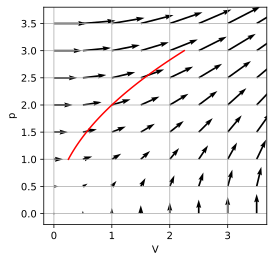

In [6]:
p = arange(0 ,4, 0.5)
V = arange(0, 4, 0.5)
V_, p_ = meshgrid(V, p)
Fp = 3/2*V_
FV = 5/2*p_

t = linspace(0.5, 1.5)
p = 2*t
V = t**2 

figure(figsize=(4,4))
Q = quiver(V_,p_, FV, Fp, units='xy', scale=15)
plot(V, p, 'r')
xlabel('V')
ylabel('p')
ylim(-.2, 3.8)
grid(True)

Die Wärme $Q$ entlang des Prozesses wird über das "Arbeits"-integral $Q = \int T \,\text{d}S = \int \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V$ wie folgt berechnet:

$$\begin{align}
Q &= \int \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V \\
  &= \int_{0.5}^{1.5} \frac{3}{2}t^2 2\,\text{d}t + \frac{5}{2}2t 2t\,\text{d}t \\
  &= \int_{0.5}^{1.5} 13 t^2\,\text{d}t \\
  &= \frac{13}{6}(1.5^3 - 0.5^3) = 7.04
\end{align}$$

Die **Arbeit** $W$, die vom Gas bei einem Prozess geleistet wird, kann über das Arbeitsintegral

$$W = \int p \,\text{d}V$$

berechnet werden.

Wir zeichnen nun das Vektorfeld des Arbeitsdifferentials $p\,\text{d}V$ in der $(p,V)$-Ebene. Zudem zeichnen wir wieder den Prozesse $s(t) = \begin{pmatrix} p(t) \\ V(t) \end{pmatrix} = \begin{pmatrix} 2t \\ t^2 \end{pmatrix}$ für $t_1=0.5$ bis $t_2=1.5$ ein.

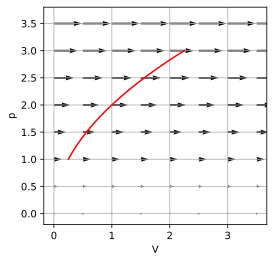

In [7]:
p = arange(0 ,4, 0.5)
V = arange(0, 4, 0.5)
V_, p_ = meshgrid(V, p)
FV = p_
Fp = 0*ones(V_.shape)

t = linspace(0.5, 1.5)
p = 2*t
V = t**2 

figure(figsize=(4,4))
Q = quiver(V_,p_, FV, Fp, units='xy', scale=7)
plot(V, p, 'r')
xlabel('V')
ylabel('p')
ylim(-.2, 3.8)
grid(True)

Die Arbeit $W$ entlang des Prozesses berechnet sich wie folgt:

$$\begin{align}
W =& \int p\,\text{d}V \\
  =& \int_{0.5}^{1.5} 2t 2t\,\text{d}t \\
  =& \int_{0.5}^{1.5} 4 t^2\,\text{d}t \\
  =& \frac{4}{3}(1.5^3 - 0.5^3) = 4.33
\end{align}$$

## Berechnungsvarianten 

Wir betrachten Arbeitsintegrale in der $(x,y)$-Ebene. Je nach Kurve kann das Arbeitsintegral auf verschiedene Arten berechnet werden. 

- **allgemein parametrisierte Kurve:** $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix}$: allgemeinste Methode, siehe Beispiele oben, $\text{d}x = x'(t)\,\text{d}t$ und $\text{d}y = y'(t)\,\text{d}t$

- **Kurve, die sich nach $x$ parametrisieren lässt:** $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(x) = \begin{pmatrix} x \\ y(x) \end{pmatrix}$: $\text{d}x = \text{d}x$ und $\text{d}y = y'(x)\,\text{d}x$

- **horizontales Geradenstück auf Höhe $y_0$:** $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(x) = \begin{pmatrix} x \\ y_0 \end{pmatrix}$: $\text{d}x = \text{d}x$ und $\text{d}y = 0$

- **Kurve, die sich nach $y$ parametrisieren lässt:** $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(y) = \begin{pmatrix} x(y) \\ y \end{pmatrix}$: $\text{d}x = x'(y)\,\text{d}y$ und $\text{d}y = \text{d}y$

- **vertikales Geradenstück bei $x_0$:** $s:\mathbb{R} \rightarrow \mathbb{R}^2: s(y) = \begin{pmatrix} x_0 \\ y \end{pmatrix}$: $\text{d}x = 0$ und $\text{d}y = \text{d}y$

## Weg(un)abhängigkeit

Nicht jedes Differential $F_p (p,V)\,\text{d}p + F_V (p,V)\,\text{d}V$ bzw. $F_x (x,y)\,\text{d}x + F_y (x,y)\,\text{d}y$ ist das Differential $\text{d}f$ einer Funktion $f(p,V)$ bzw. $f(x,y)$. Insbesondere sind das Wärmedifferential $T\,\text{d}S$ und das Arbeitsdifferential $p\,\text{d}V$ keine Differentiale von Funktionen der Koordinaten $(p,V)$.

- Differentiale, die das Differential einer Funktion $f$ sind, heißen **exakte Differentiale** und werden mit dem Symbol d geschrieben: $\text{d}f$. Das zugehörige Vektorfeld heißt **konservativ** und ist das Gradientenfeld $\text{grad}(f)$ der Funktion $f$.
- Differentiale, die keine Differentiale von Funktionen sind, heißen **inexakte Differentiale** und werden oft mit dem Symbol $\delta$ geschrieben, um sie nicht mit exakten Differentialen zu verwechseln: $\delta Q = T\,\text{d}S$, $\delta W = p\,\text{d}V$. Das zugehörige Vektorfeld heißt **nicht konservativ** und ist kein Gradientenfeld.

Das Arbeitsintegral entlang einer Kurve von $A$ nach $B$ über ein exaktes Differential $\text{d}f$ erfüllt

$$\int \text{d}f = f(B) - f(A).$$

Das Ergebnis ist also nur vom Anfangspunkt $A$ und vom Endpunkt $B$ der Kurve abhängig aber nicht vom Prozess dazwischen. Man sagt, dass ein solches Arbeitsintegral **prozessunabhängig** ist. Die Differenz $f(B) - f(A)$ wird als $\Delta f$ geschrieben: $\Delta f = f(B) - f(A)$. 
Es folgt, dass das Arbeitsintegral über ein exaktes Differential entlang einer geschlossenen Kurve  (Kreisprozess) ist Null.

Das Arbeitsintegral entlang eines Prozesses über ein nicht exaktes Differential wie z. B. $\delta Q$ ist hingegen **prozessabhängig**. Die Wärme $Q = \int\delta Q = \int T\,\text{d}S$ ist daher genauso wie die Arbeit $W = \int\delta W = \int p\,\text{d}V$ abhängig vom Prozess zwischen dem Anfangszustand $A$ und dem Endzustand $B$. Daher macht es insbesondere keinen Sinn, von *der Wärme oder der Arbeit des Gases in einem bestimmten Zustand* zu sprechen. Man bezeichnet prozessabhängige Arbeitsintegrale als **Prozessgrößen**. Prozessunabhängige Arbeitsintegrale sind hingegen immer **Änderungen von Zustandsgrößen**, da diese Arbeitsintegrale als Integrale über Differentiale einer Funktion der Zustandskoordinaten, auch **Zustandsfunktion** genannt, geschrieben werden können.

Arbeitet man mit Vektorfeldern statt Differentialen, so ist das Arbeitsintegral entlang einer Kurve von $A$ nach $B$ über ein konservatives Vektorfeld $\text{grad}(f)$ durch

$$\int \text{grad}(f) \cdot \text{d}s = f(B) - f(A) = \Delta f$$

gegeben. Das Ergebnis ist also wieder nur vom Anfangspunkt $A$ und vom Endpunkt $B$ der Kurve abhängig aber nicht vom Weg dazwischen. Man verwendet nun die Begriffe **weg(un)abhängig** statt prozess(un)abhängig und **Skalarfeld** oder **Potential(funktion)** statt Zustandsgröße oder Zustandsfunktion. 
Es folgt wieder, dass das Arbeitsintegral über ein konservatives Vektorfeld entlang einer geschlossenen Kurve (geschlossener Weg) ist Null.

Es gibt ein einfaches **Kriterium**, um bestimmen zu können, ob das Arbeitsintegral über ein Differential $F_p (p,V)\,\text{d}p + F_V (p,V)\,\text{d}V$ oder ein Vektorfeld  $F=\begin{pmatrix} F_x (x,y) \\ F_y (x,y) \end{pmatrix}$ prozess(un)abhängig bzw. weg(un)abhängig ist.

- Differentiale: prozessunabhängig $\Leftrightarrow\frac{\partial F_p}{\partial V} = \frac{\partial F_V}{\partial p}$, prozessabhängig $\Leftrightarrow\frac{\partial F_p}{\partial V} \neq \frac{\partial F_V}{\partial p}$
- Vektorfelder: wegunabhängig: $\Leftrightarrow\text{rot}(F) = 0$, wegabhängig $\Leftrightarrow\text{rot}(F) \neq 0$

Es folgt, dass ein Gradientenfeld immer rotationsfrei ist: $\text{rot}(\text{grad}(f)) = 0$.

Wir zeigen zuerst, dass das Wärmedifferential $\delta Q$ und das Arbeitsdifferential $\delta W$ inexakt sind:

- $\delta Q = \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V$: $\frac{3}{2} \neq \frac{5}{2}$
- $\delta W = p\,\text{d}V$: $0 \neq 1$

Nun subtrahieren wir die beiden inexakten Differentiale:

$$\begin{align}
\delta Q - \delta W &= \frac{3}{2}V\,\text{d}p + \frac{5}{2}p\,\text{d}V - p\,\text{d}V \\
&= \frac{3}{2}V\,\text{d}p + \frac{3}{2}p\,\text{d}V \\
&= \text{d}(\frac{3}{2}pV) \\
&= \text{d}U
\end{align}$$

Das Ergebnis ist das Differential der inneren Energie, also ein exaktes Differential. Dieser Zusammenhang zwischen der Änderung der inneren Energie des betrachteten Systems, aufgenommener Wärme und vom Systen geleisteter Arbeit ist der erste Hauptsatz der Thermodynamik: $\text{d}U = \delta Q - \delta W$ bzw. nach Integration beider Seiten entlang eines beliebigen Prozesses: $\Delta U = Q - W$. 

**Zusammenfassung** für Arbeitsintegrale über **Differentiale** $F_p (p,V)\,\text{d}p + F_V (p,V)\,\text{d}V$:

| **Integrand**                   | exakt                                                                                                                                                                                                                                      | inexakt                                                                |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------|
| Beispiele                       | $\text{d}U$, $\text{d}p$, $\text{d}V$, $\text{d}T$, $\text{d}S$                                                                                                                                                                           | $\delta Q$, $\delta W$                                                 |
| **Integral**                    | prozessunabhängig                                                                                                                                                                                                                          | prozessabhängig                                                        |
| Beispiele                       | Änderung der inneren Energie $\Delta U = \int \text{d}U$, Druckänderung $\Delta p= \int \text{d}p$, Volumenänderung $\Delta V= \int \text{d}V$, Temperaturänderung $\Delta T= \int \text{d}T$, Entropieänderung $\Delta S= \int \text{d}S$ | Wärme $Q = \int \delta Q$, Arbeit $W= \int \delta W$                   |
| Änderung einer Zustandsfunktion | ja, Zustandsgrößenänderung                                                                                                                                                                                                                 | nein, Prozessgröße                                                     |
| Beispiele                       | Zustandsgrößen (Zustandsfunktionen) innere Energie $U$, Druck $p$, Volumen $V$, Temperatur $T$, Entropie $S$                                                                                                                               |                                                                        |
| **Kriterium**                   | $\frac{\partial F_p}{\partial V} = \frac{\partial F_V}{\partial p}$                                                                                                                                                                        | $\frac{\partial F_p}{\partial V} \neq \frac{\partial F_V}{\partial p}$ |

**Zusammenfassung** für Arbeitsintegrale über **Vektorfelder** $F=\begin{pmatrix} F_x (x,y) \\ F_y (x,y) \end{pmatrix}$:

| **Vektorfeld**                   | konservativ, Gradientenfeld                                                                                                                                  | nicht konservativ                                     |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------|
| Beispiele                        | Schwerefeld $F = \begin{pmatrix} 0,\\ -mg \end{pmatrix}= \text{grad}(-mgy)$, $F =\begin{pmatrix} 2x \\ 2y \end{pmatrix}= \text{grad}(x^2 + y^2)$             | Wirbelfeld $F =\begin{pmatrix} -y \\ x \end{pmatrix}$ |
| **Integral**                     | wegunabhängig                                                                                                                                                | wegabhängig                                           |
| Beispiele                        | Änderung der potentiellen Energie $\Delta U = mg\Delta y= -\int \begin{pmatrix} 0 \\ -mg \end{pmatrix} \cdot\text{d}s$. Achtung: zusätzliches Minuszeichen! | Reibung                                               |
| Änderung einer Potentialfunktion | ja, Potentialdifferenz, elektrische Spannung. Achtung: zusätzliches Minuszeichen                                                                             | nein                                                  |
| Beispiele                        | mechanische und elektrische potentielle Energie. Achtung: zusätzliches Minuszeichen                                                                          |                                                       |
| **Kriterium**                    | $\text{rot}(F) = 0$, also wirbelfrei                                                                                                                                           | $\text{rot}(F) \neq 0$                                |

## Potentialfunktionen

Falls ein Differential exakt ist bzw. das zugehörige Vektorfeld konservativ ist, dann ist das betrachtete Differential das Differential $\text{d}f$ einer Funktion $f$ bzw. das  Vektorfeld ist das Gradientenfeld $\text{grad}(f)$ dieser Funktion, meist Potentialfunktion genannt. Aus $\int \text{d}f = f(B) - f(A)$ folgt durch Umformen $f(B) = \int \text{d}f + f(A)$.
Der Wert der Potentialfunktion am Punkt $B$ ist also durch das Arbeitsintegral von $A$ nach $B$ plus dem Wert der Potentialfunktion am Punkt $A$ gegeben. Die Wahl des Prozesses bzw. Weges von $A$ nach $B$ ist irrelevant. Der Wert der Potentialfunktion am Punkt $B$ ist bis auf die additive Konstante (Offset) $f(A)$ eindeutig. 


**Beispiel:**

Wir betrachten das Differential $(6xy + 1)\,\text{d}x + 3x^2\,\text{d}y$ und wählen die Punkte $A=(0,0)$ und $B=(x,y)$. Den Offest $f(A)$ setzen wir Null. Als Kurve von $A=(0,0)$ nach $B=(x,y)$ verwenden wir ein horizontales Geradenstück auf Höhe $y=0$ von $(0,0)$ nach $(x,0)$ fortgesetzt mit einem vertikalen Geradenstück von $(x,0)$ nach $(x,y)$.

$$\begin{align}
f(B)   &= \int \text{d}f + f(A) \\
f(x,y) &= \int \text{d}f  \\
       &= \int_{(0,0)}^{(x,0)} (6xy + 1)\,\text{d}x + 3x^2\,\text{d}y + \int_{(x,0)}^{(x,y)} (6xy + 1)\,\text{d}x + 3x^2\,\text{d}y \\
       &= x + 3x^2y
\end{align}$$

Als Probe berechnen wir das Differential der Funktion $f(x,y) = x + 3x^2y$ und erhalten $\text{d}f = (6xy + 1)\,\text{d}x + 3x^2\,\text{d}y$.